In [1]:
import pandas as pd #importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cardio = pd.read_csv('Cardiotocographic.csv') #importing the dataset
print(cardio.shape)
cardio.head()

(2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


Dataset:

LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.

AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.

FM - May indicate "Fetal Movements" detected by the monitor.

UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.

DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.

DS - May represent "Decelerations Short" or decelerations of brief duration.

DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.

ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.

MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.

ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.

MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.

By considering the above terms I conclude that the dataset is about heart rate of a baby in mother womb

### Data Cleaning and Preparation:

In [9]:
cardio.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
for i in cardio.columns:
    cardio[i].fillna(cardio[i].median(),inplace=True) #Replacing null values with median
cardio.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

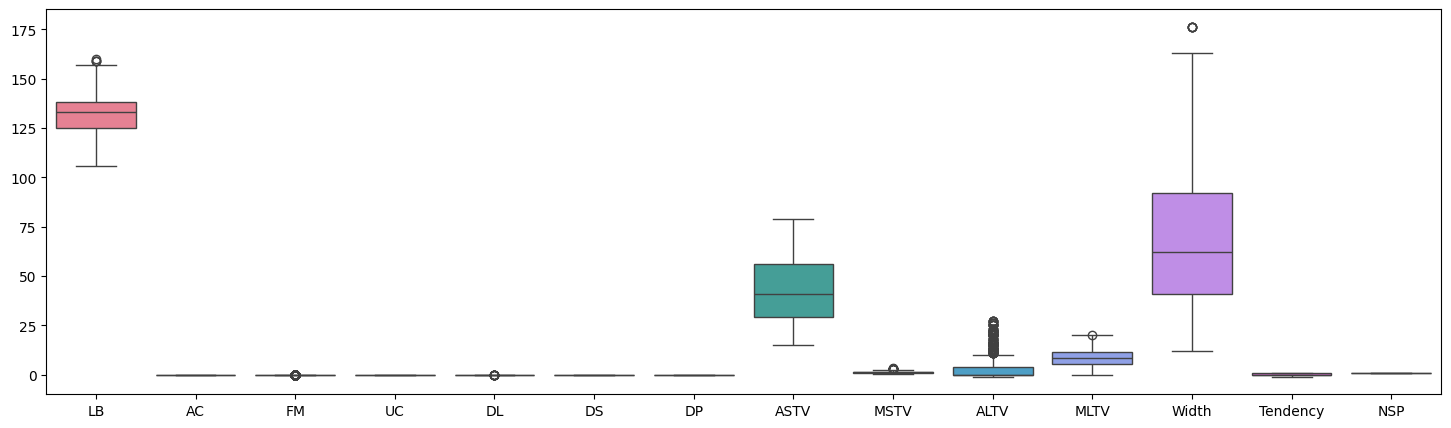

In [11]:
plt.figure(figsize=(18,5))
sns.boxplot(data=cardio)
plt.show()

In [12]:
def outlier_filter(df):
    outliers = pd.DataFrame() #Creating a dataframe for append the outliers to it
    for i in df.columns:
        q1 = df[i].quantile(0.25) #Calculating the first quantile
        q3 = df[i].quantile(0.75) #Calculating the second quantile

        IQR = q3 - q1 #Calculating the IQR value

        lower_bound = q1 - (IQR * 1.5) #Calculating lower bound value
        upper_bound = q3 + (IQR * 1.5) #Calculating upper bound value

        outliers_data = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
 #find the outliers in the dataset
        outliers = pd.concat([outliers, outliers_data]) #Append the value to outliers dataframe

    return outliers #Get the dataset which contains outliers in the dataset

outliers = outlier_filter(cardio)
cardio_outliers = outliers.drop_duplicates().reset_index().drop('index',axis=1) #Create a separate dataframe for outliers by droping duplicates
cardio_outliers
     

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,159.0,0.000834,0.000000,0.008340,0.000000,0.0,0.0,61.0,0.400000,8.0,8.6,44.000000,1.0,1.0
1,159.0,0.001587,0.000000,0.009524,0.000000,0.0,0.0,58.0,0.500000,0.0,7.8,44.000000,1.0,1.0
2,159.0,0.000000,0.000000,0.005682,0.000000,0.0,0.0,57.0,0.500000,0.0,8.1,22.000000,0.0,1.0
3,160.0,0.009868,0.000000,0.008224,0.000000,0.0,0.0,58.0,0.800000,0.0,8.2,74.000000,0.0,1.0
4,146.0,0.004580,-0.001776,0.004580,0.000000,0.0,0.0,39.0,0.800000,21.0,5.2,28.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,140.0,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.700000,17.0,6.0,31.000000,0.0,1.0
341,110.0,0.003264,0.000000,0.006529,0.004353,0.0,0.0,63.0,2.407081,0.0,1.8,176.310998,-1.0,1.0
342,110.0,0.002757,0.000000,0.007581,0.004135,0.0,0.0,64.0,2.100000,0.0,5.6,176.000000,-1.0,1.0
343,110.0,0.004342,0.000620,0.008685,0.003722,0.0,0.0,64.0,2.200000,0.0,5.3,176.020748,-1.0,1.0


In [13]:
data = cardio[~cardio.index.isin(outliers.index)] #Creating dataframe by removing the outliers in the dataset
cardio = data.reset_index().drop('index',axis=True)
cardio

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.100000,0.000000,10.4,130.000000,0.0,1.0
1,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.100000,0.000000,13.4,130.000000,0.0,1.0
2,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.400000,0.000000,19.9,117.000000,1.0,1.0
3,133.000000,0.001634,0.0,0.008086,0.000000,0.0,0.0,29.0,1.300000,0.000000,7.4,67.000000,0.0,1.0
4,144.000000,0.008143,0.0,0.006595,0.000000,0.0,0.0,33.0,1.100000,-0.060411,6.2,100.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,134.878101,0.006127,0.0,0.001225,0.000000,0.0,0.0,58.0,1.100000,0.000000,4.3,53.000000,0.0,1.0
547,135.000000,0.007798,0.0,0.005240,0.000000,0.0,0.0,58.0,1.000000,0.000000,4.7,58.000000,0.0,1.0
548,130.000000,0.009401,0.0,0.003535,0.000000,0.0,0.0,67.0,1.048883,0.000000,1.0,45.000000,0.0,1.0
549,130.000000,0.004789,0.0,0.000958,0.000000,0.0,0.0,73.0,0.600000,9.000000,5.0,32.000000,0.0,1.0


In [14]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        551 non-null    float64
 1   AC        551 non-null    float64
 2   FM        551 non-null    float64
 3   UC        551 non-null    float64
 4   DL        551 non-null    float64
 5   DS        551 non-null    float64
 6   DP        551 non-null    float64
 7   ASTV      551 non-null    float64
 8   MSTV      551 non-null    float64
 9   ALTV      551 non-null    float64
 10  MLTV      551 non-null    float64
 11  Width     551 non-null    float64
 12  Tendency  551 non-null    float64
 13  NSP       551 non-null    float64
dtypes: float64(14)
memory usage: 60.4 KB


In [15]:
cardio_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        345 non-null    float64
 1   AC        345 non-null    float64
 2   FM        345 non-null    float64
 3   UC        345 non-null    float64
 4   DL        345 non-null    float64
 5   DS        345 non-null    float64
 6   DP        345 non-null    float64
 7   ASTV      345 non-null    float64
 8   MSTV      345 non-null    float64
 9   ALTV      345 non-null    float64
 10  MLTV      345 non-null    float64
 11  Width     345 non-null    float64
 12  Tendency  345 non-null    float64
 13  NSP       345 non-null    float64
dtypes: float64(14)
memory usage: 37.9 KB


In [16]:
cardio.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.0,551.0,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.0
mean,131.359587,0.004110,0.000006,0.005169,0.001199,0.0,0.0,37.359701,1.237704,1.370628,9.432558,63.023414,0.317550,1.0
std,9.688991,0.003748,0.000062,0.002648,0.001890,0.0,0.0,13.765398,0.459951,2.666415,4.225993,28.231026,0.587028,0.0
min,106.000000,-0.000122,-0.000325,-0.000101,-0.000080,0.0,0.0,16.000000,0.300000,-0.899870,0.000000,20.000000,-1.006614,1.0
25%,123.000000,0.000822,0.000000,0.003359,0.000000,0.0,0.0,26.000000,0.900000,0.000000,6.900000,40.000000,0.000000,1.0
50%,132.000000,0.003490,0.000000,0.005298,0.000000,0.0,0.0,34.000000,1.200000,0.000000,9.600000,56.717868,0.000000,1.0
75%,138.000000,0.006719,0.000000,0.007030,0.001909,0.0,0.0,49.000000,1.500000,1.000000,12.175379,84.157939,1.000000,1.0
max,157.000000,0.013861,0.000792,0.012072,0.007645,0.0,0.0,75.000000,2.600000,10.000000,19.900000,141.000000,1.023635,1.0


In [17]:
cardio_outliers.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.0,345.0,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.0
mean,132.657685,0.003917,0.001564,0.004628,0.002103,0.0,0.0,50.620417,1.331343,5.999874,7.260567,75.387624,0.359642,1.0
std,8.855434,0.003652,0.001791,0.002771,0.002558,0.0,0.0,13.353647,0.648408,8.371982,4.497083,36.846479,0.584118,0.0
min,110.000000,0.000000,-0.002467,0.000000,-0.000124,0.0,0.0,15.000000,0.300000,-1.043619,-0.136053,12.000000,-1.000000,1.0
25%,127.000000,0.000000,0.000000,0.002669,0.000000,0.0,0.0,41.000000,0.800000,0.000000,4.400000,42.000000,0.000000,1.0
50%,133.000000,0.003049,0.001203,0.004600,0.000714,0.0,0.0,53.893492,1.200000,0.000000,6.800000,77.000000,0.000000,1.0
75%,138.000000,0.006579,0.002655,0.006579,0.004111,0.0,0.0,60.000000,1.706831,13.000000,9.200000,101.000000,1.000000,1.0
max,160.000000,0.013624,0.006272,0.011609,0.008197,0.0,0.0,79.000000,3.200000,27.000000,20.000000,176.310998,1.016484,1.0


### Data Visualization

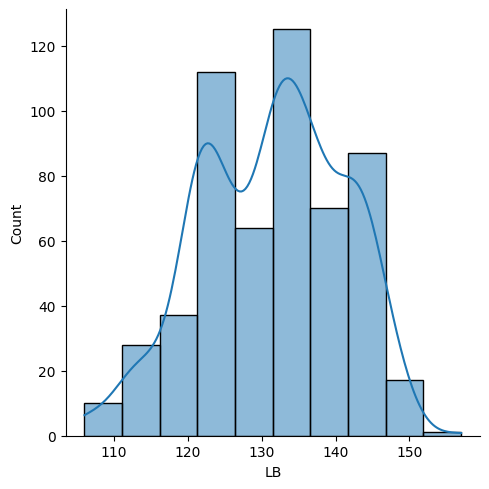

In [18]:
sns.displot(data=cardio,x='LB',bins=10,kde=True)#Creating histogram using seaborn with 10 bins for LB column of dataset which does not contain outliers
plt.show()

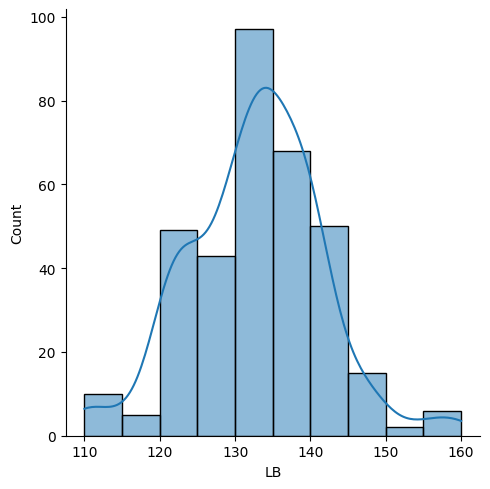

In [19]:
sns.displot(data=cardio_outliers,x='LB',bins=10,kde=True) #Creating histogram using seaborn with 10 bins for LB column of dataset which contains outliers
plt.show()

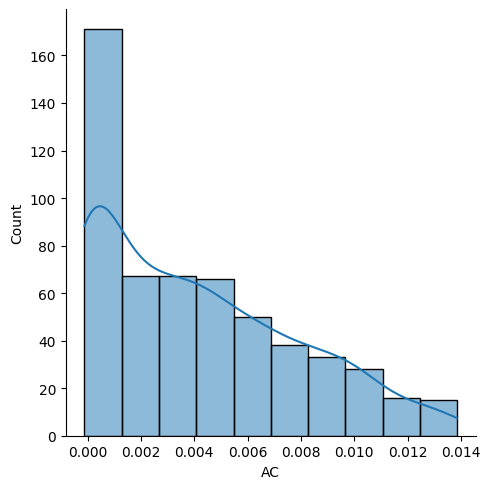

In [20]:
sns.displot(data=cardio,x='AC',bins=10,kde=True)
plt.show()

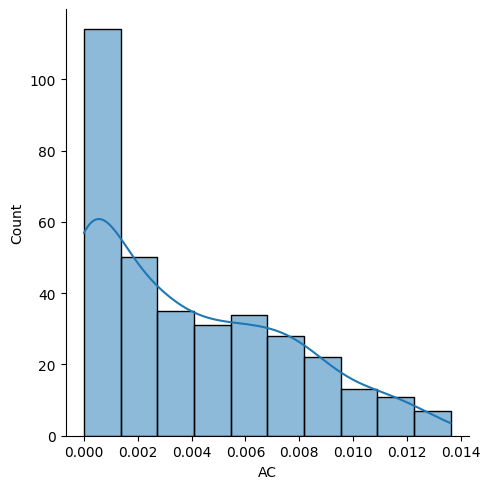

In [21]:
sns.displot(data=cardio_outliers,x='AC',bins=10,kde=True)
plt.show()

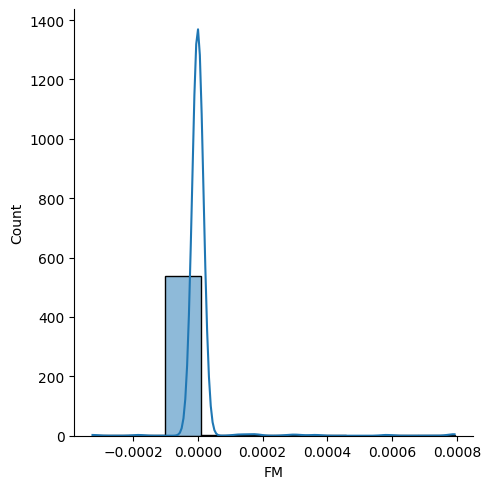

In [22]:
sns.displot(data=cardio,x='FM',bins=10,kde=True)
plt.show()

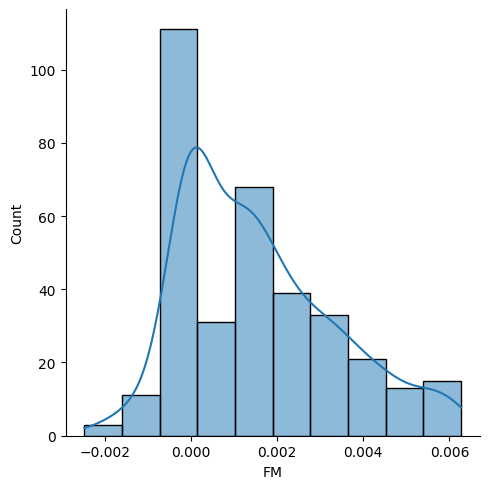

In [23]:
sns.displot(data=cardio_outliers,x='FM',bins=10,kde=True)
plt.show()
     

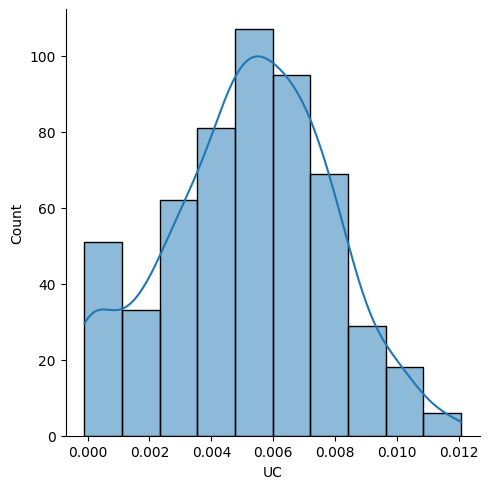

In [24]:
sns.displot(data=cardio,x='UC',bins=10,kde=True)
plt.show()

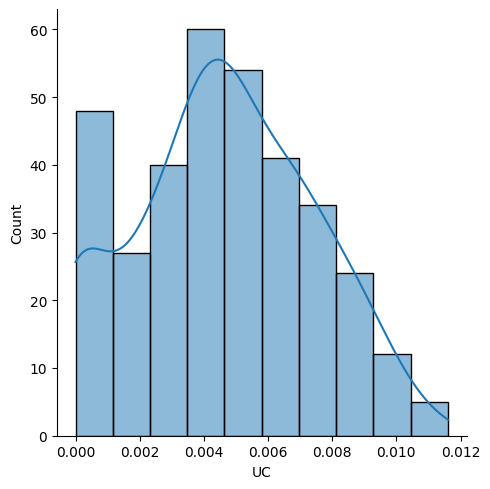

In [25]:
sns.displot(data=cardio_outliers,x='UC',bins=10,kde=True)
plt.show()
     

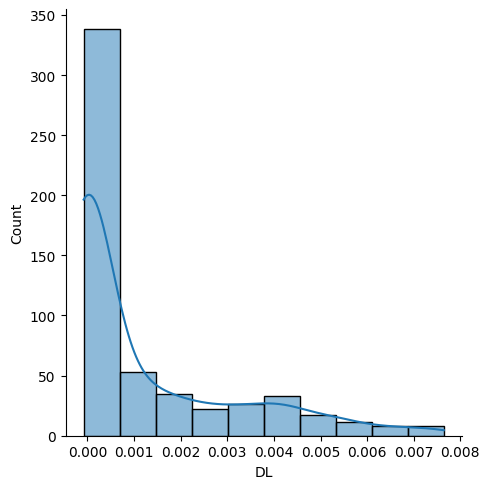

In [26]:
sns.displot(data=cardio,x='DL',bins=10,kde=True)
plt.show()
     

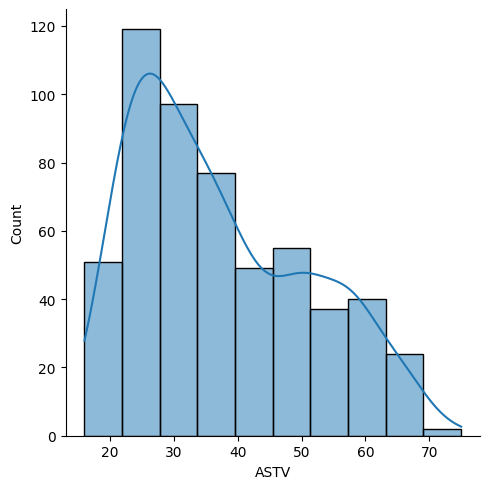

In [27]:
sns.displot(data=cardio,x='ASTV',bins=10,kde=True)
plt.show()
     

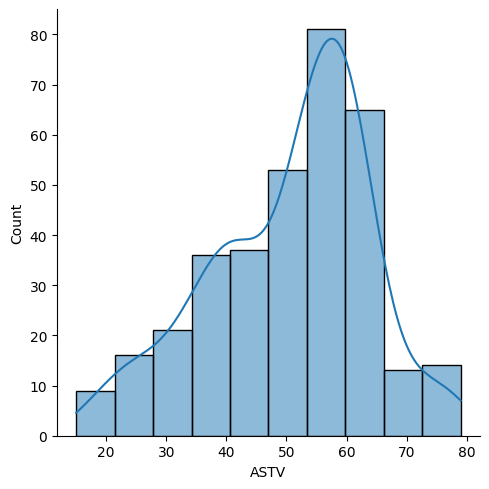

In [28]:
sns.displot(data=cardio_outliers,x='ASTV',bins=10,kde=True)
plt.show()

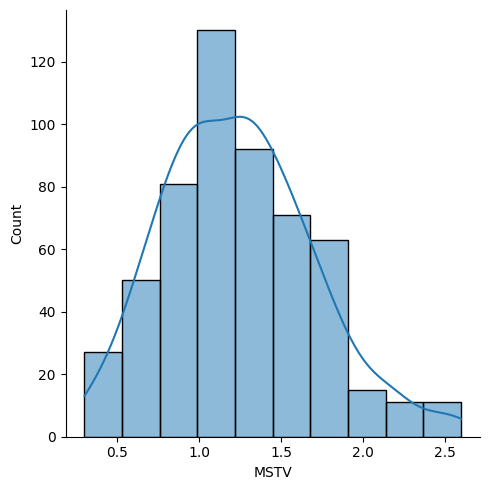

In [29]:
sns.displot(data=cardio,x='MSTV',bins=10,kde=True)
plt.show()

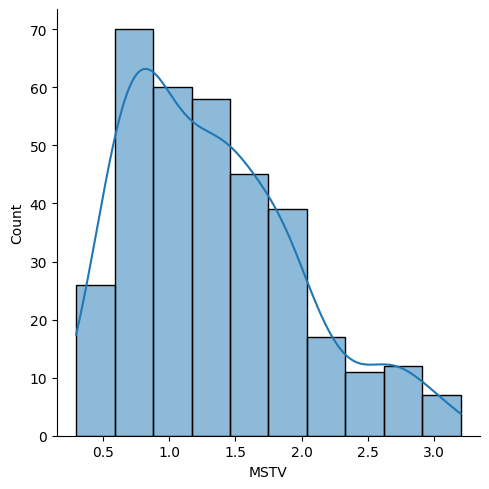

In [30]:
sns.displot(data=cardio_outliers,x='MSTV',bins=10,kde=True)
plt.show()

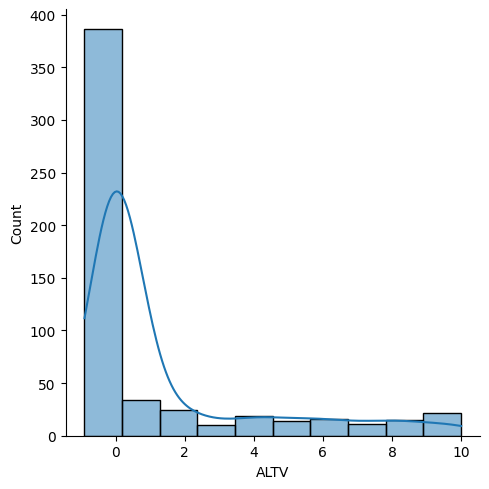

In [31]:
sns.displot(data=cardio,x='ALTV',bins=10,kde=True)
plt.show()
     

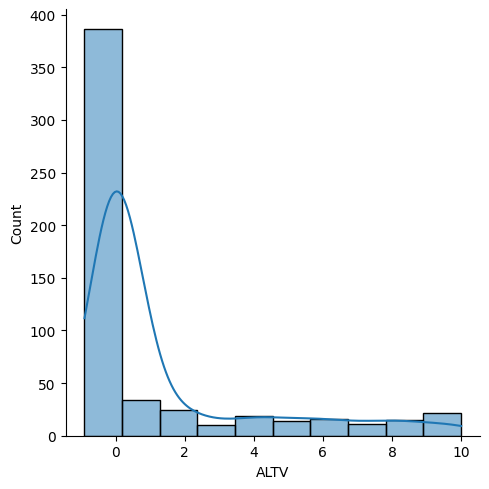

In [32]:
sns.displot(data=cardio,x='ALTV',bins=10,kde=True)
plt.show()
     

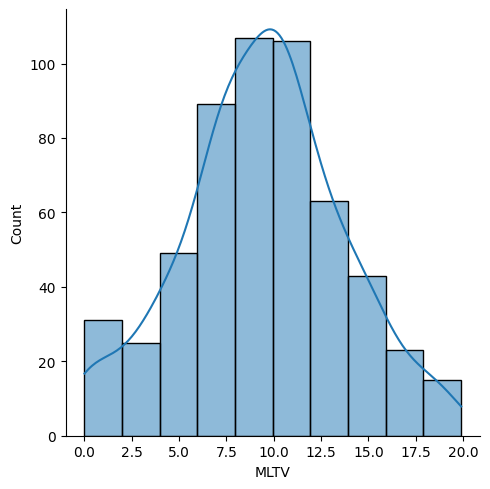

In [33]:
sns.displot(data=cardio,x='MLTV',bins=10,kde=True)
plt.show()

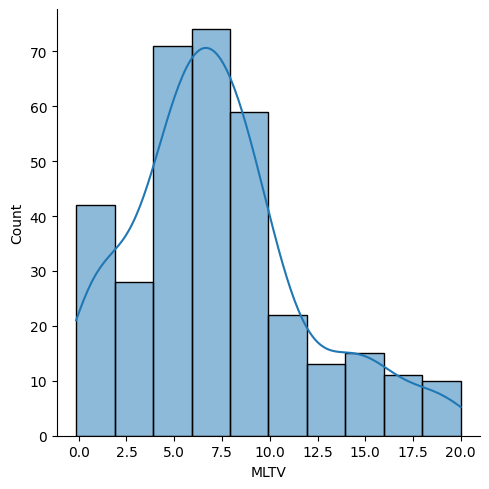

In [34]:
sns.displot(data=cardio_outliers,x='MLTV',bins=10,kde=True)
plt.show()

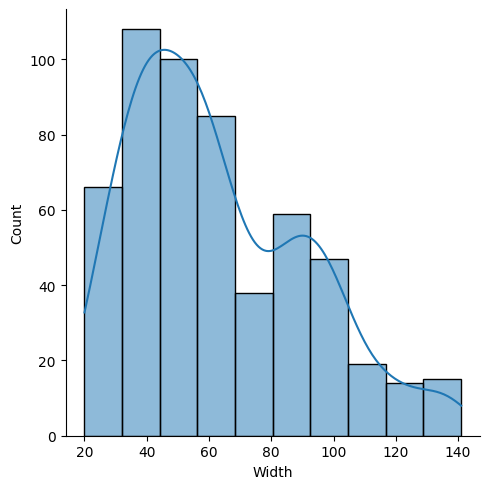

In [35]:
sns.displot(data=cardio,x='Width',bins=10,kde=True)
plt.show()

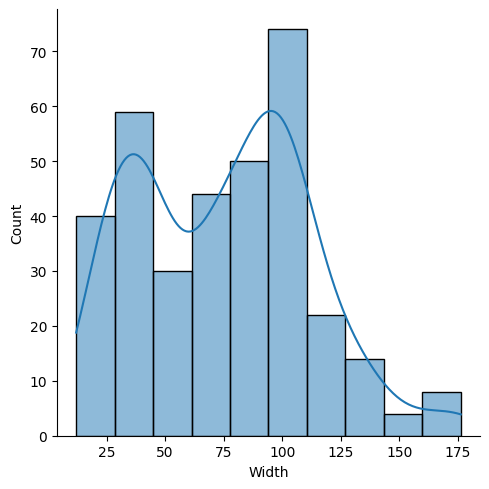

In [36]:
sns.displot(data=cardio_outliers,x='Width',bins=10,kde=True)
plt.show()
     

In [37]:
corr = cardio.corr().drop(index=['DS','DP','NSP'],columns=['DS','DP','NSP']) #Get corr matrix of dataset. Here I removed the DS,DP,NSP because those contains null values
corr

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
LB,1.000000,0.171189,-0.053345,-0.043915,-0.025893,0.303323,-0.268746,0.129076,-0.149595,0.080314,0.311823
AC,0.171189,1.000000,0.030433,0.077838,-0.069153,0.076655,0.179802,-0.280765,-0.562042,0.364947,0.060234
FM,-0.053345,0.030433,1.000000,0.009337,0.014220,0.078682,-0.018156,-0.020202,-0.036485,0.028105,-0.011686
UC,-0.043915,0.077838,0.009337,1.000000,0.049667,0.000223,-0.063217,-0.116725,-0.029590,0.007270,-0.061218
DL,-0.025893,-0.069153,0.014220,0.049667,1.000000,-0.203309,0.497977,-0.124606,-0.146517,0.505992,0.375206
ASTV,0.303323,0.076655,0.078682,0.000223,-0.203309,1.000000,-0.644718,0.192260,-0.216045,-0.066241,0.109412
MSTV,-0.268746,0.179802,-0.018156,-0.063217,0.497977,-0.644718,1.000000,-0.314213,0.063586,0.519263,0.064964
ALTV,0.129076,-0.280765,-0.020202,-0.116725,-0.124606,0.192260,-0.314213,1.000000,0.088947,-0.172664,0.023137
MLTV,-0.149595,-0.562042,-0.036485,-0.029590,-0.146517,-0.216045,0.063586,0.088947,1.000000,-0.128800,-0.072775
Width,0.080314,0.364947,0.028105,0.007270,0.505992,-0.066241,0.519263,-0.172664,-0.128800,1.000000,0.385182


In [38]:
corr1 = cardio_outliers.corr()
corr1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.082566,-0.060185,0.027494,0.051194,NaN,NaN,0.180680,-0.267460,0.124282,-0.035399,-0.109503,0.315034,NaN
AC,-0.082566,1.000000,0.185903,0.019528,-0.137739,NaN,NaN,-0.024702,0.131735,-0.451034,-0.189322,0.206569,-0.106967,NaN
FM,-0.060185,0.185903,1.000000,-0.287277,-0.091459,NaN,NaN,0.261817,0.108521,-0.419223,0.046604,0.093365,0.067478,NaN
UC,0.027494,0.019528,-0.287277,1.000000,0.377500,NaN,NaN,0.106163,0.319748,-0.016663,-0.277766,0.073956,-0.099101,NaN
DL,0.051194,-0.137739,-0.091459,0.377500,1.000000,NaN,NaN,0.035515,0.510165,-0.248150,-0.209968,0.532537,0.238165,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.180680,-0.024702,0.261817,0.106163,0.035515,NaN,NaN,1.000000,-0.186318,-0.121337,-0.329397,-0.075972,-0.001506,NaN
MSTV,-0.267460,0.131735,0.108521,0.319748,0.510165,NaN,NaN,-0.186318,1.000000,-0.461964,-0.040974,0.546136,0.043969,NaN
ALTV,0.124282,-0.451034,-0.419223,-0.016663,-0.248150,NaN,NaN,-0.121337,-0.461964,1.000000,0.006827,-0.400958,-0.023286,NaN


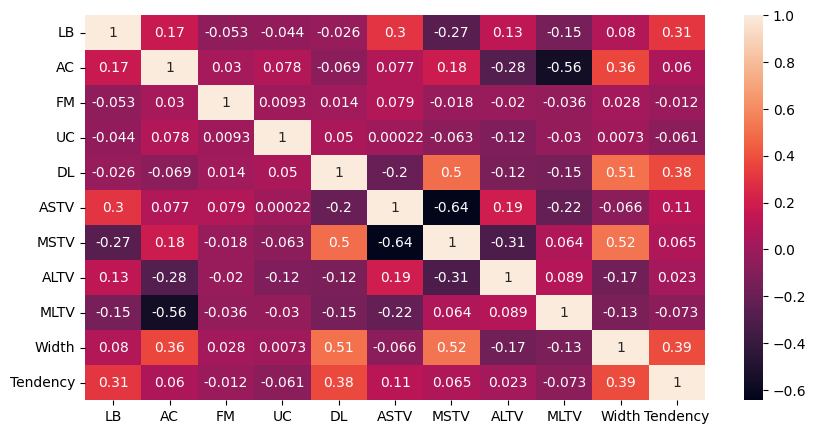

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True) #Ploting heatmap for correlation matrix
plt.show()

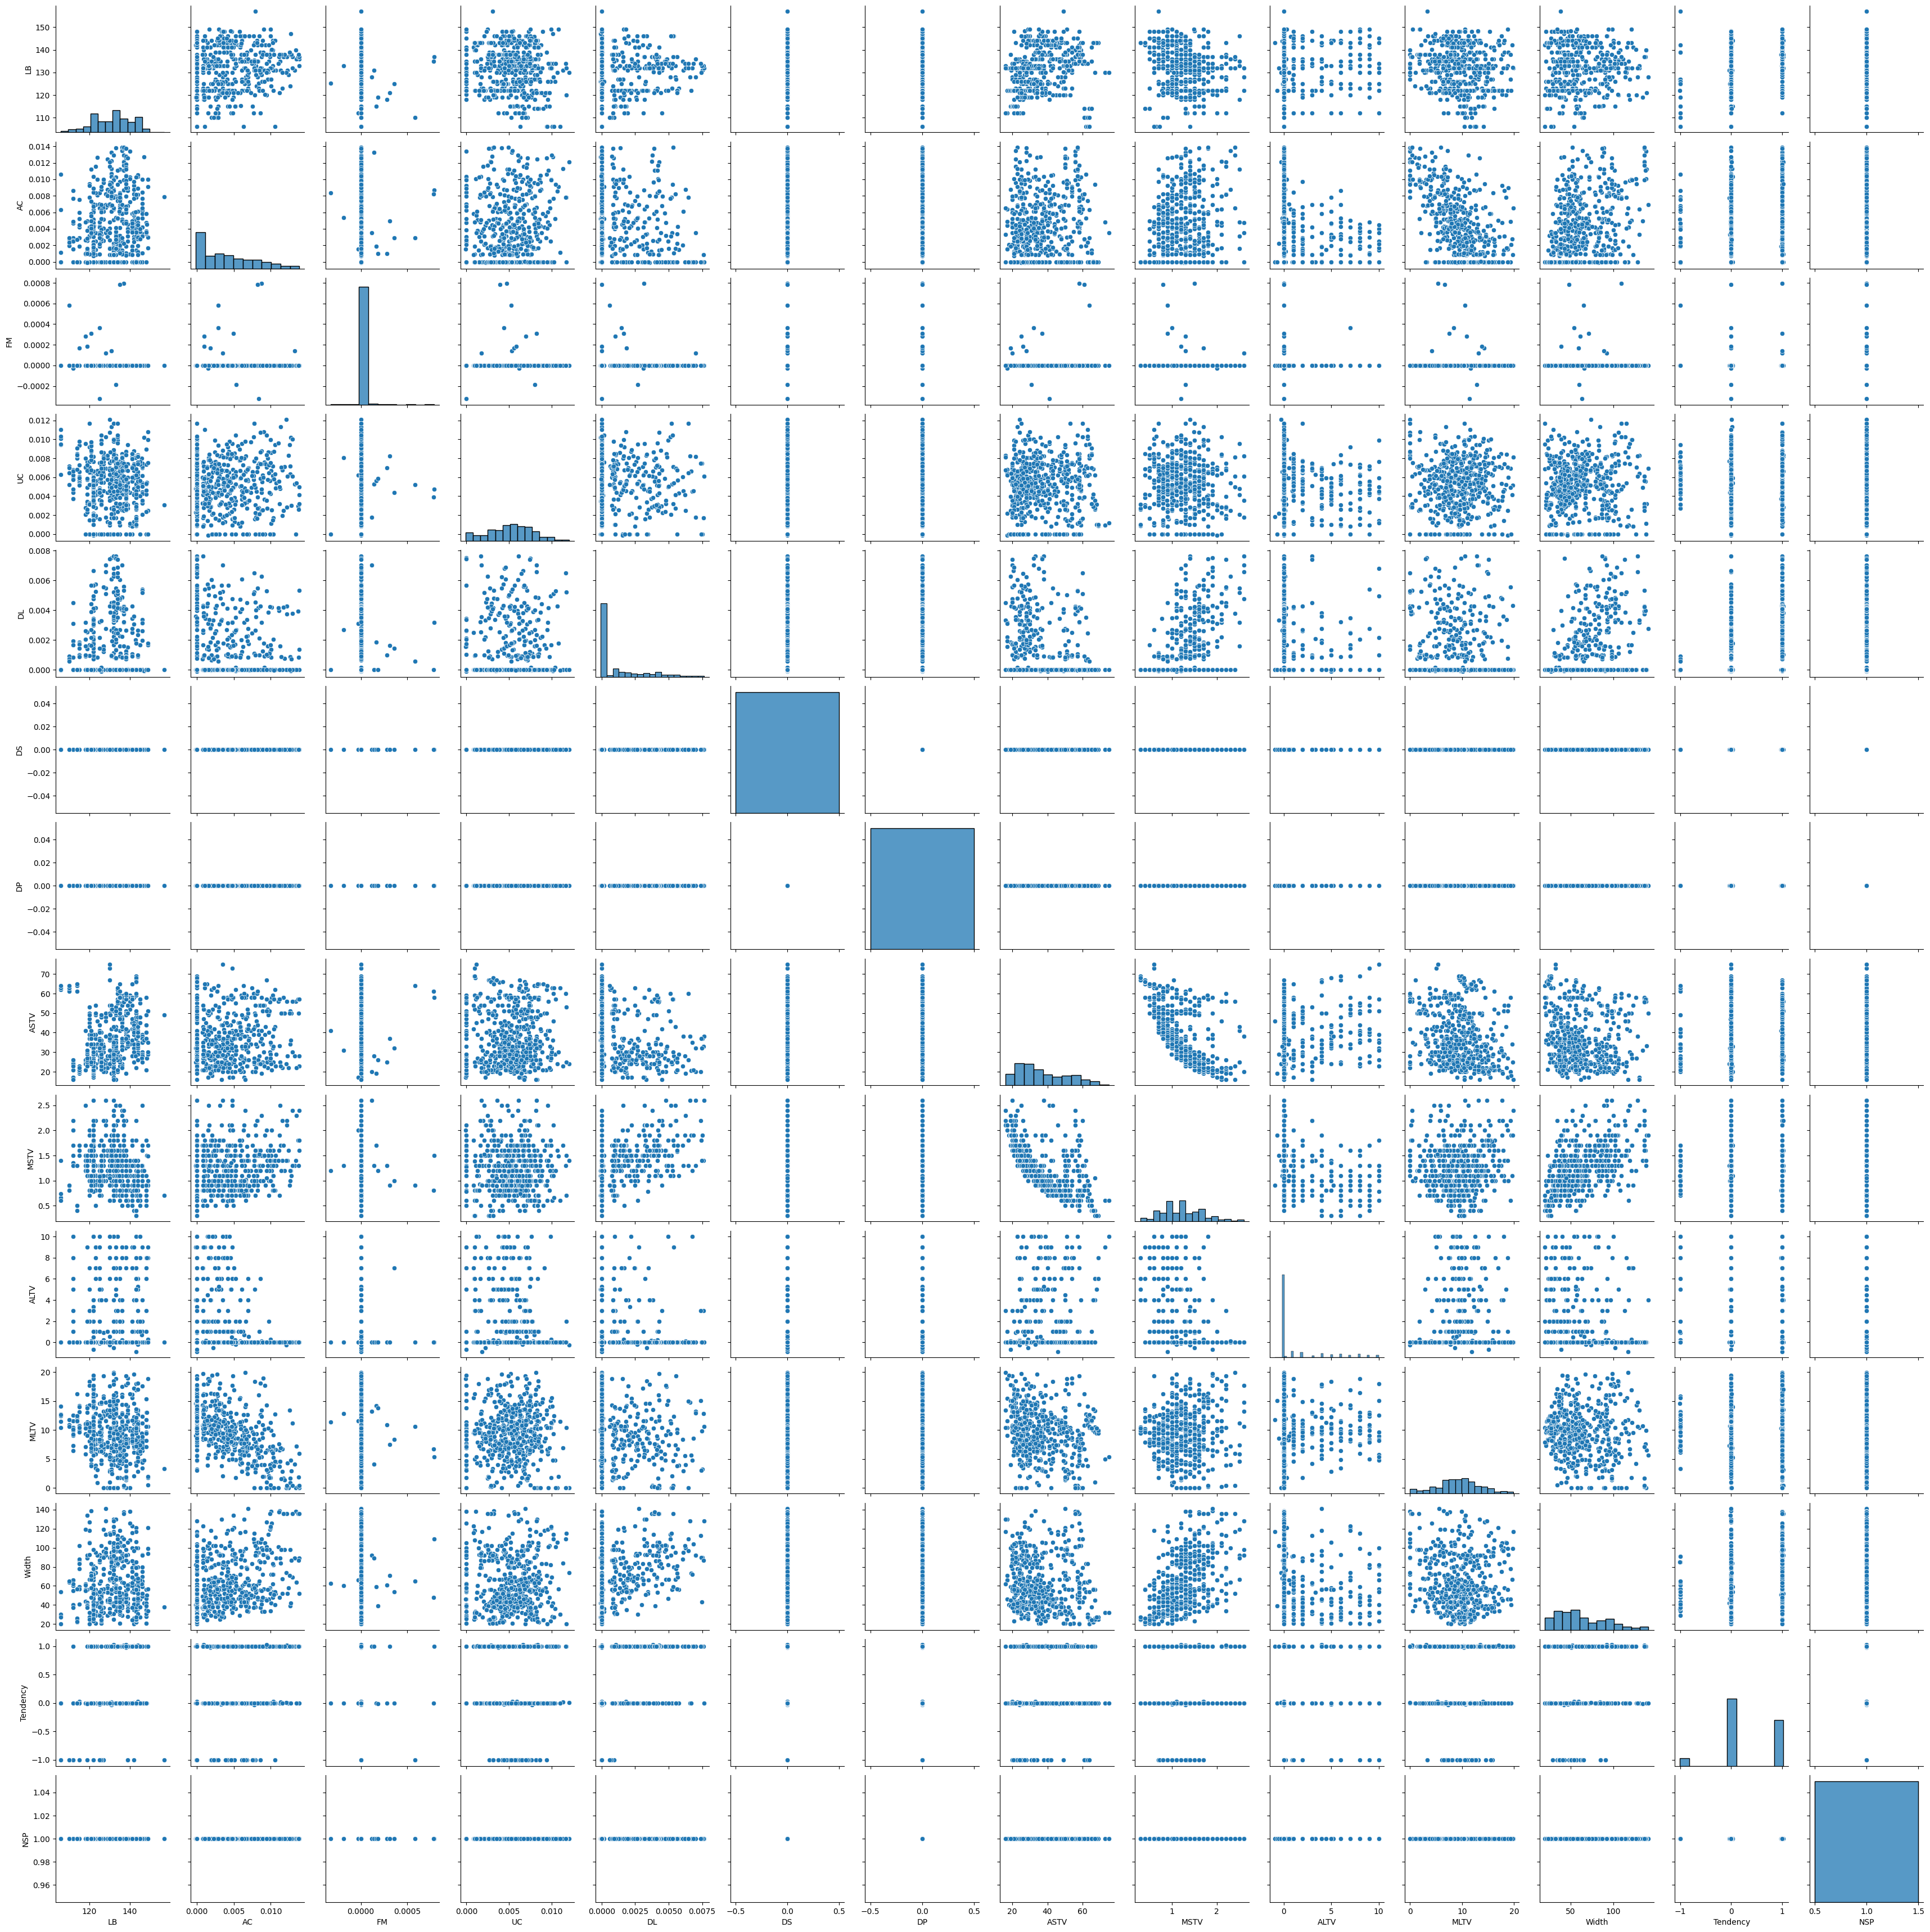

In [40]:
sns.pairplot(cardio) #Ploting pair plot using seaborn for dataset which does not cointains outliers
plt.show()

### Pattern Recognition and Insights:

Key Insights

Strongly Correlated :

The pair of columns (Width,MSTV), (Width,DL) and (MSTV,DL) are highly correlated with each other with the value 0.54 almost. It indicates that when the value increase one another column value also increases simultaneously.

Moderate Correlation :

The pair of column (LB,Tendency),(FM,ASTV) and (DL,Tendency) are moderately correlated with each other.

Weak Correlation :

The columns (MLTV,AC),(ALTV,AC),(MLTV,ASTV),(ALTV,MSTV) are with weak correlation or negative correlation.It indicates that when the value increase in the one column then the value is decrease in the another column

The dataset set does not contains any date column so it is difficult to Look for trends or patterns over time

#### Conclusion:

Key Insights:

Distribution Characteristics:

Many variables exhibit skewness, indicating non-normal distributions. Variables such as 'AC', 'FM', and 'NSP' show significant skewness, suggesting that they may require transformations for certain statistical analyses. Correlation Patterns:

Strong positive correlations were identified between variables like MSTV and DL, as well as Width and MSTV. These relationships suggest that certain measures of variability are closely related. Variable Importance:

The 'LB' variable has a wide range, indicating variability in fetal heart rates across observations. This could be critical for assessing fetal well-being. Potential Redundancies:

High correlations between certain variables suggest redundancy, which could be considered in model development to avoid multicollinearity.

Further Analyses:

Clinical Monitoring:

Understanding the relationships between different cardiotocographic measures can enhance clinical decision-making in fetal monitoring. For instance, recognizing that higher short-term variability correlates with abnormal long-term variability can help clinicians identify at-risk fetuses more effectively.

Predictive Modeling:

The insights gained from the correlation analysis can inform the selection of features for predictive models. Variables that are strongly correlated with outcomes of interest can be prioritized in model development.

Data Transformation:

The non-normal distributions of several variables suggest that data transformations may be necessary to meet the assumptions of parametric statistical tests.